In [27]:
import pandas as pd
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import numpy as np
#import pymysql
#pymysql.install_as_MySQldb()
# %matplotlib inline

### Store CSV into DataFrame

In [28]:
csv_file = "./Resources/Womens_GrandSlam.csv"
womens_df = pd.read_csv(csv_file)
womens_df.head()

,Year,Major,Champion,Seed_Champion,Ctry_Champion,Runner-up,Seed_Runner-up,Ctry_Runner-up,Score in the Final
0,1968,2,Nancy Richey,5,USA,Ann Haydon Jones,2,GBR,"5–7, 6–4, 6–1"
1,1968,3,Billie Jean King,1,USA,Judy Tegart,7,AUS,"9–7, 7–5"
2,1968,4,Virginia Wade,6,GBR,Billie Jean King,1,USA,"6–4, 6–2"
3,1969,1,Margaret Court,2,AUS,Billie Jean King,1,USA,"6–4, 6–1"
4,1969,2,Margaret Court,1,AUS,Ann Haydon Jones,3,GBR,"6–1, 4–6, 6–3"


### Create new data with select columns

In [29]:
womens_grand_slam_df = womens_df[['Year', 'Major', 'Champion']].copy()
womens_grand_slam_df.head()

,Year,Major,Champion
0,1968,2,Nancy Richey
1,1968,3,Billie Jean King
2,1968,4,Virginia Wade
3,1969,1,Margaret Court
4,1969,2,Margaret Court


In [30]:
csv_file = "./Resources/Mens_GrandSlam.csv"
mens_grand_slam_df = pd.read_csv(csv_file)
mens_grand_slam_df.head()

,Year,Major#,Champion,Seed_Champion,Ctry_Champion,Runner-up,Seed_Runner-up,Ctry_Runner-up,Score in the Final
0,1968,2,Ken Rosewall,2,AUS,Rod Laver,1,AUS,"6–3, 6–1, 2–6, 6–2"
1,1968,3,Rod Laver,1,AUS,Tony Roche,15,AUS,"6–3, 6–4, 6–2"
2,1968,4,Arthur Ashe,5,USA,Tom Okker,8,NED,"14–12, 5–7, 6–3, 3–6, 6–3"
3,1969,1,Rod Laver,1,AUS,Andrés Gimeno,9,ESP,"6–3, 6–4, 7–5"
4,1969,2,Rod Laver,1,AUS,Ken Rosewall,4,AUS,"6–4, 6–3, 6–4"


In [31]:
mens_grand_slam_df.rename(columns={'Major#': 'Major'}, inplace=True)
mens_grand_slam_df.head()

,Year,Major,Champion,Seed_Champion,Ctry_Champion,Runner-up,Seed_Runner-up,Ctry_Runner-up,Score in the Final
0,1968,2,Ken Rosewall,2,AUS,Rod Laver,1,AUS,"6–3, 6–1, 2–6, 6–2"
1,1968,3,Rod Laver,1,AUS,Tony Roche,15,AUS,"6–3, 6–4, 6–2"
2,1968,4,Arthur Ashe,5,USA,Tom Okker,8,NED,"14–12, 5–7, 6–3, 3–6, 6–3"
3,1969,1,Rod Laver,1,AUS,Andrés Gimeno,9,ESP,"6–3, 6–4, 7–5"
4,1969,2,Rod Laver,1,AUS,Ken Rosewall,4,AUS,"6–4, 6–3, 6–4"


### Connect to local database

In [32]:
#rds_connection_string = "<insert user name>:<insert password>@localhost:5432/customer_db"
database_path = "./Resources/tennis.sqlite"
engine = create_engine(f"sqlite:///{database_path}")

### Check for tables

In [33]:
engine.table_names()

['GrandSlamChamps', 'Mens', 'Womens', 'men_champion', 'women_champion']

### Use pandas to load csv converted DataFrame into database

In [34]:
womens_grand_slam_df.to_sql(name='Womens', con=engine, if_exists='replace', index=False)
engine.table_names()

['GrandSlamChamps', 'Mens', 'Womens', 'men_champion', 'women_champion']

In [35]:
mens_grand_slam_df.to_sql(name='Mens', con=engine, if_exists='replace', index=False)
engine.table_names()


['GrandSlamChamps', 'Mens', 'Womens', 'men_champion', 'women_champion']

In [48]:
Mens_Womens_Champion_df = mens_grand_slam_df.merge(womens_grand_slam_df, how='outer', on=['Year', 'Major'], suffixes=('_Mens', '_Womens'))
Mens_Womens_Champion_df.head()
Mens_Womens_Champion_df.to_sql(name = 'GrandSlamChamps', con = engine, if_exists = 'replace', index=False)

### Confirm data has been added by querying the Womens table
* NOTE: can also check using pgAdmin

In [49]:
pd.read_sql_query('select * from Womens ', con=engine).head()

,Year,Major,Champion
0,1968,2,Nancy Richey
1,1968,3,Billie Jean King
2,1968,4,Virginia Wade
3,1969,1,Margaret Court
4,1969,2,Margaret Court


In [50]:
pd.read_sql_query('select * from Mens', con=engine).head()

,Year,Major,Champion,Seed_Champion,Ctry_Champion,Runner-up,Seed_Runner-up,Ctry_Runner-up,Score in the Final
0,1968,2,Ken Rosewall,2,AUS,Rod Laver,1,AUS,"6–3, 6–1, 2–6, 6–2"
1,1968,3,Rod Laver,1,AUS,Tony Roche,15,AUS,"6–3, 6–4, 6–2"
2,1968,4,Arthur Ashe,5,USA,Tom Okker,8,NED,"14–12, 5–7, 6–3, 3–6, 6–3"
3,1969,1,Rod Laver,1,AUS,Andrés Gimeno,9,ESP,"6–3, 6–4, 7–5"
4,1969,2,Rod Laver,1,AUS,Ken Rosewall,4,AUS,"6–4, 6–3, 6–4"


In [51]:
#pd.read_sql_query('select * from Mens join Womens on Mens.Year = Womens.Year', con=engine).head(20)

#select film.film_id, film.title, count(film_actor.actor_id)
#from film
#inner join film_actor on film.film_id = film_actor.film_id
#group by film.film_id;


In [53]:
pd.read_sql_query('select * from GrandSlamChamps ', con=engine).head(20)

,Year,Major,Champion_Mens,Seed_Champion,Ctry_Champion,Runner-up,Seed_Runner-up,Ctry_Runner-up,Score in the Final,Champion_Womens
0,1968,2,Ken Rosewall,2,AUS,Rod Laver,1,AUS,"6–3, 6–1, 2–6, 6–2",Nancy Richey
1,1968,3,Rod Laver,1,AUS,Tony Roche,15,AUS,"6–3, 6–4, 6–2",Billie Jean King
2,1968,4,Arthur Ashe,5,USA,Tom Okker,8,NED,"14–12, 5–7, 6–3, 3–6, 6–3",Virginia Wade
3,1969,1,Rod Laver,1,AUS,Andrés Gimeno,9,ESP,"6–3, 6–4, 7–5",Margaret Court
4,1969,2,Rod Laver,1,AUS,Ken Rosewall,4,AUS,"6–4, 6–3, 6–4",Margaret Court
5,1969,3,Rod Laver,1,AUS,John Newcombe,6,AUS,"6–4, 5–7, 6–4, 6–4",Ann Jones
6,1969,4,Rod Laver,1,AUS,Tony Roche,3,AUS,"7–9, 6–1, 6–2, 6–2",Margaret Court
7,1970,1,Arthur Ashe,4,USA,Dick Crealy,12,AUS,"6–4, 9–7, 6–2",Margaret Court
8,1970,2,Jan Kodeš,7,TCH,Željko Franulović,5,YUG,"6–2, 6–4, 6–0",Margaret Court
9,1970,3,John Newcombe,2,AUS,Ken Rosewall,5,AUS,"5–7, 6–3, 6–2, 3–6, 6–1",Margaret Court


In [54]:
Womens_Champ_Results_df = pd.read_sql_query("select Champion_Womens, count(Champion_Womens) from GrandSlamChamps group by Champion_Womens", con=engine)
Womens_Champ_Results_df.head()

,Champion_Womens,count(Champion_Womens)
0,Amélie Mauresmo,2
1,Ana Ivanovic,1
2,Anastasia Myskina,1
3,Angelique Kerber,3
4,Ann Jones,1


In [55]:
names_only = Womens_Champ_Results_df.Champion_Womens
names_only.head()

#cnt_only = Womens_Champ_Results_df[1]
#cnt_only.head()
#= pd.read_sql_query("select Champion_Womens, count(Champion_Womens) from GrandSlamChamps group by Champion_Womens", con=engine)

0      Amélie Mauresmo
1         Ana Ivanovic
2    Anastasia Myskina
3     Angelique Kerber
4            Ann Jones
Name: Champion_Womens, dtype: object

In [56]:
plot_women_DF = Womens_Champ_Results_df.transpose()
plot_women_DF.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
Champion_Womens,Amélie Mauresmo,Ana Ivanovic,Anastasia Myskina,Angelique Kerber,Ann Jones,Arantxa Sánchez Vicario,Barbara Jordan,Billie Jean King,Carolina Wozniacki,Chris Evert,...,Simona Halep,Sloane Stephens,Steffi Graf,Sue Barker,Svetlana Kuznetsova,Tracy Austin,Venus Williams,Victoria Azarenka,Virginia Ruzici,Virginia Wade
count(Champion_Womens),2,1,1,3,1,4,1,8,1,17,...,1,1,22,1,2,2,7,2,1,3


In [57]:
Mens_Champ_Results_df = pd.read_sql_query("select Champion_Mens, count(Champion_Mens) from GrandSlamChamps group by Champion_Mens", con=engine)
Mens_Champ_Results_df.head()

,Champion_Mens,count(Champion_Mens)
0,Adriano Panatta,1
1,Albert Costa,1
2,Andre Agassi,8
3,Andrés Gimeno,1
4,Andrés Gómez,1


In [58]:
plot_mens_DF = Mens_Champ_Results_df.transpose()
plot_mens_DF.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
Champion_Mens,Adriano Panatta,Albert Costa,Andre Agassi,Andrés Gimeno,Andrés Gómez,Andy Murray,Andy Roddick,Arthur Ashe,Björn Borg,Boris Becker,...,Roscoe Tanner,Sergi Bruguera,Stan Smith,Stan Wawrinka,Stefan Edberg,Thomas Johansson,Thomas Muster,Vitas Gerulaitis,Yannick Noah,Yevgeny Kafelnikov
count(Champion_Mens),1,1,8,1,1,3,1,3,11,6,...,2,2,2,3,6,1,1,2,1,2


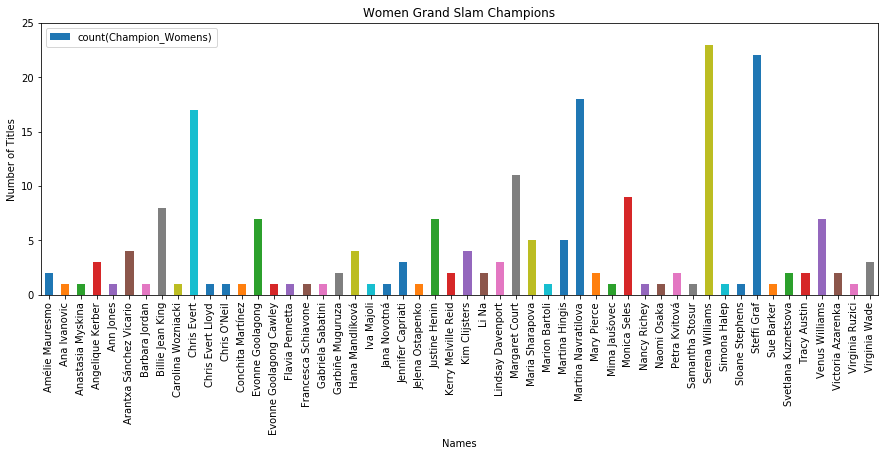

In [26]:
fig = plt.figure
plt.rcParams['figure.figsize'] = (15,5)
Womens_Champ_Results_df.plot(kind='bar', x ='Champion_Womens', y ='count(Champion_Womens)' )
plt.title("Women Grand Slam Champions")
plt.xlabel("Names")
plt.ylabel("Number of Titles")
plt.ylim(0, 25)
plt.show(fig)

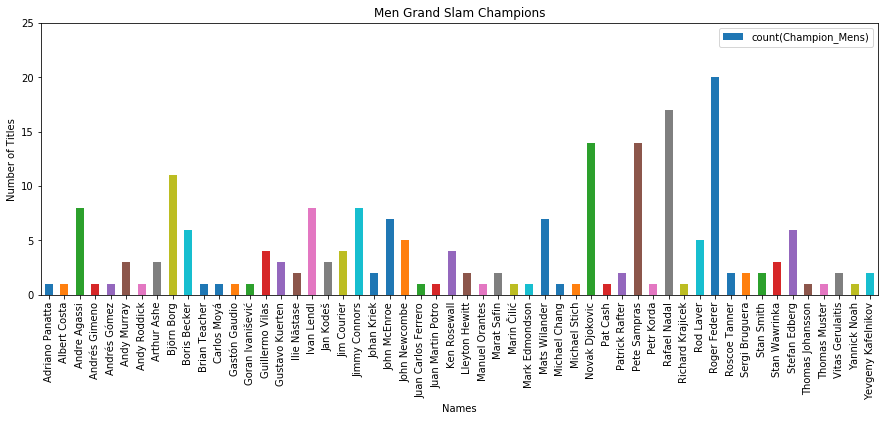

In [58]:
fig = plt.figure
plt.rcParams['figure.figsize'] = (15,5)
Mens_Champ_Results_df.plot(kind='bar', x ='Champion_Mens', y ='count(Champion_Mens)' )
# Add labels to the x and y axes
plt.title("Men Grand Slam Champions")
plt.xlabel("Names")
plt.ylabel("Number of Titles")
plt.ylim(0, 25)
plt.show(fig)